In [1]:
# Module importieren


import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


In [2]:
# Datensatz laden

airbnb = pd.read_csv('Datensatz_Airbnb.csv')
airbnb.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [23]:
airbnb['Day'].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [7]:


sortet_price_airbnb = airbnb.sort_values(by='Price')



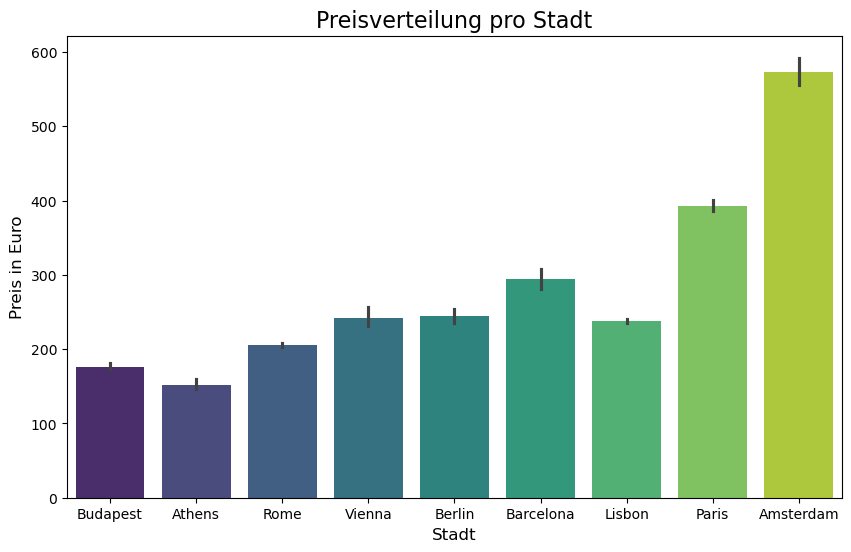

In [46]:
# Balkendiagramm Preisverteilung pro Stadt

plt.figure(figsize=(10,6))
sns.barplot(sortet_price_airbnb, x='City', y='Price', hue='City', palette='viridis')
plt.title('Preisverteilung pro Stadt', fontsize=16)
plt.xlabel('Stadt', fontsize=12)
plt.ylabel('Preis in Euro', fontsize=12)
plt.savefig('erste_grafik.png', dpi=300, bbox_inches='tight')
plt.show()

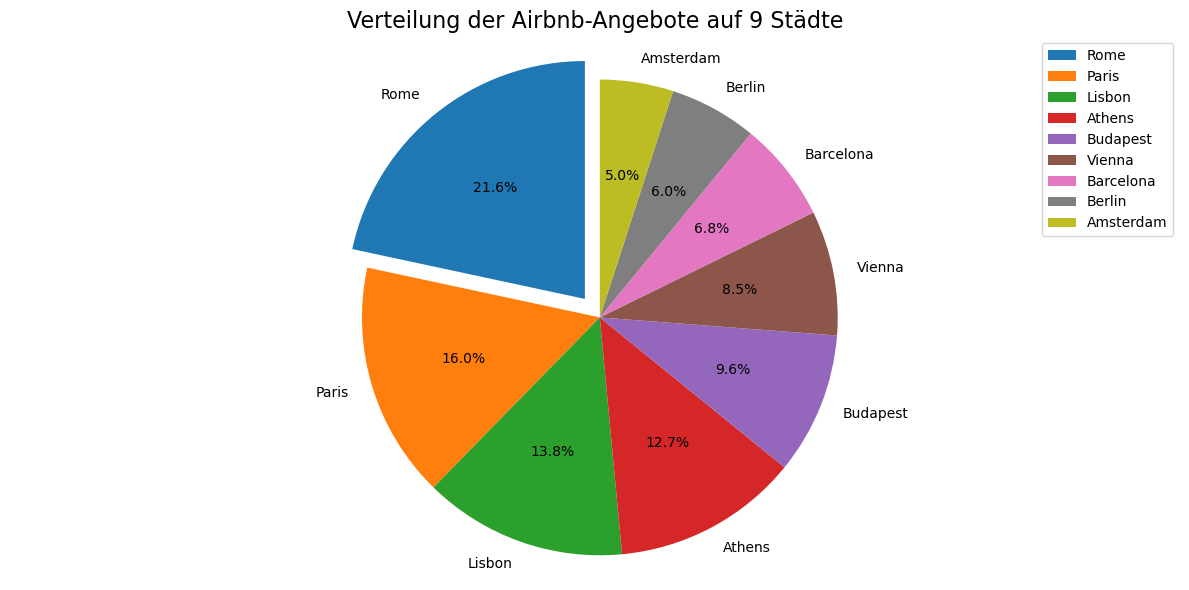

In [7]:
# Kreisdiagram der Verteilung der Airbnb-Angebote auf die 9 Städte

# Daten vorbereiten
city_count = airbnb['City'].value_counts()
largest_index = city_count.idxmax()
explode = [0.1 if city == largest_index else 0 for city in city_count.index]

plt.figure(figsize=(12,6))
plt.pie(city_count.values, labels=city_count.index, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Verteilung der Airbnb-Angebote auf 9 Städte', fontsize= 16)
plt.axis('equal')
plt.legend()
plt.savefig('zweite_grafik.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

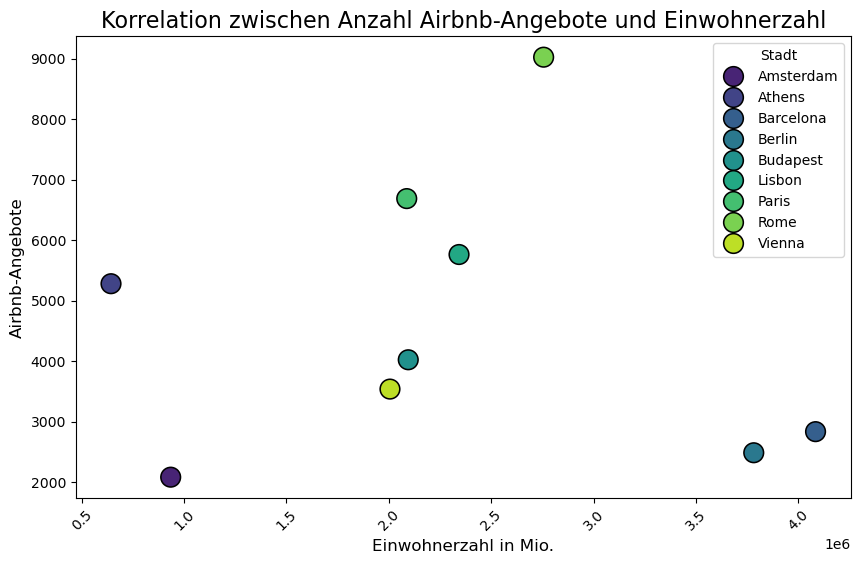

In [48]:
# Streudiagramm der Korrelation zwsichen Einwohnerzahl und Anzahl der Airbnb-Angebote

# Daten von Einwohnerzahlen von Google
data = {
    'Stadt': ['Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Budapest', 'Lisbon', 'Paris', 'Rome', 'Vienna'],
    'Einwohnerzahl': [934927, 643452, 4084000, 3782202, 2095000, 2343000, 2087577, 2756134, 2005760],
    'Airbnb-Angebote': [None, None, None, None, None, None, None, None, None]
}
city_counts = airbnb.groupby('City').size().reset_index(name='Anzahl der Angebote')
city_counts = city_counts.sort_values('Anzahl der Angebote', ascending=False)

for i , stadt in enumerate(data['Stadt']):
    for j, city in enumerate(city_counts['City']):
        if stadt == city:
            data['Airbnb-Angebote'][i] = city_counts['Anzahl der Angebote'][i]

# DataFrame erzeugen
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Einwohnerzahl', y='Airbnb-Angebote', s=200, edgecolor='black', data=df, hue='Stadt', palette='viridis')
plt.title('Korrelation zwischen Anzahl Airbnb-Angebote und Einwohnerzahl', fontsize=16)
plt.xlabel('Einwohnerzahl in Mio.', fontsize=12)
plt.ylabel('Airbnb-Angebote', fontsize=12)
plt.xticks(rotation=45)
plt.savefig('dritte_grafik.png', dpi=300, bbox_inches='tight')
plt.show()


In [16]:
# Daten filtern und vorbereiten
zimmer_typen = ['Private room', 'Entire home/apt', 'Shared room']
filtered_df = airbnb[airbnb['Room Type'].isin(zimmer_typen)]
agg_df = filtered_df.groupby(['City', 'Room Type'])['Price'].mean().unstack()

print(agg_df)


Room Type  Entire home/apt  Private room  Shared room
City                                                 
Amsterdam       734.699030    383.468718   280.903616
Athens          155.079543    112.838060    78.610490
Barcelona       629.855642    214.714206   124.068083
Berlin          363.205813    180.520256   153.192356
Budapest        184.573180    109.137759   126.830447
Lisbon          282.495813    148.902035   103.062725
Paris           425.107824    299.218870   152.356013
Rome            240.784170    148.787371    96.731583
Vienna          256.557459    190.426164   145.253372


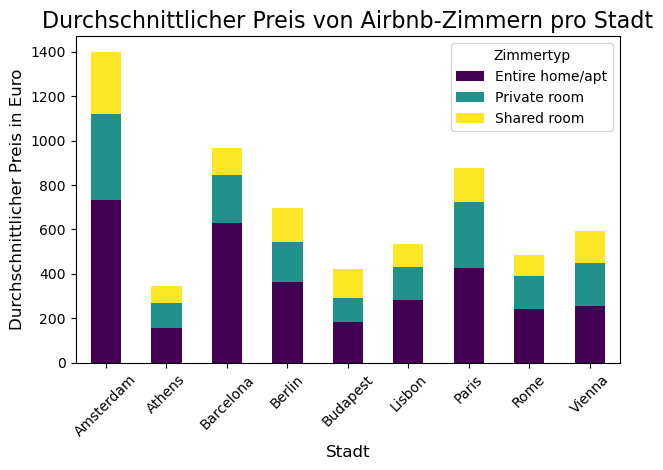

In [49]:
# Gestapeltes Balkendiagramm Vergleich Airbnb-Zimmer vs Hotelzimmer pro Stadt
ax = agg_df.plot(kind='bar', stacked=True, colormap='viridis')



plt.title('Durchschnittlicher Preis von Airbnb-Zimmern pro Stadt', fontsize=16)
plt.xlabel('Stadt', fontsize=12)
plt.ylabel('Durchschnittlicher Preis in Euro', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Zimmertyp')
plt.tight_layout()
plt.savefig('vierte_grafik.png', dpi=300, bbox_inches='tight')

plt.show()



In [24]:
airbnb.head(1
            )

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.53938,78.690379,4.166708,98.253896,6.846473


C:\Users\morit\AppData\Local\Temp\ipykernel_22604\3028964817.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Day', y='Price', data=price_comparison, palette='viridis')


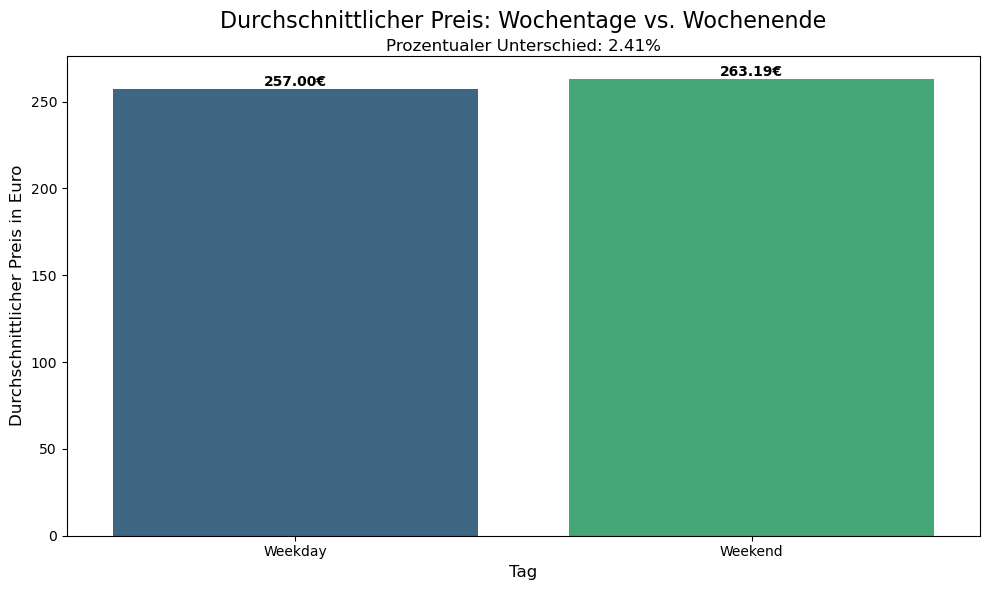

In [50]:

price_comparison = airbnb.groupby('Day')['Price'].mean().reset_index()


weekday_price = price_comparison.loc[price_comparison['Day'] == 'Weekday', 'Price'].values[0]
weekend_price = price_comparison.loc[price_comparison['Day'] == 'Weekend', 'Price'].values[0]
percent_diff = ((weekend_price - weekday_price) / weekday_price) * 100


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Day', y='Price', data=price_comparison, palette='viridis')


plt.title('Durchschnittlicher Preis: Wochentage vs. Wochenende', fontsize=16, pad=20)


plt.text(0.5, 1.02, f'Prozentualer Unterschied: {percent_diff:.2f}%', 
         ha='center', va='center', fontsize=12, transform=ax.transAxes)

plt.xlabel('Tag', fontsize=12)
plt.ylabel('Durchschnittlicher Preis in Euro', fontsize=12)


for index, row in price_comparison.iterrows():
    plt.text(index, row['Price'], f'{row["Price"]:.2f}€', color='black', ha='center', va='bottom', fontweight='bold')

plt.savefig('fuenfte_grafik.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

C:\Users\morit\AppData\Local\Temp\ipykernel_22604\2494754186.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_data, x='City', y='Price', ax=ax1, palette='viridis')
C:\Users\morit\AppData\Local\Temp\ipykernel_22604\2494754186.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_data, x='City', y='Guest Satisfaction', ax=ax2, palette='viridis')


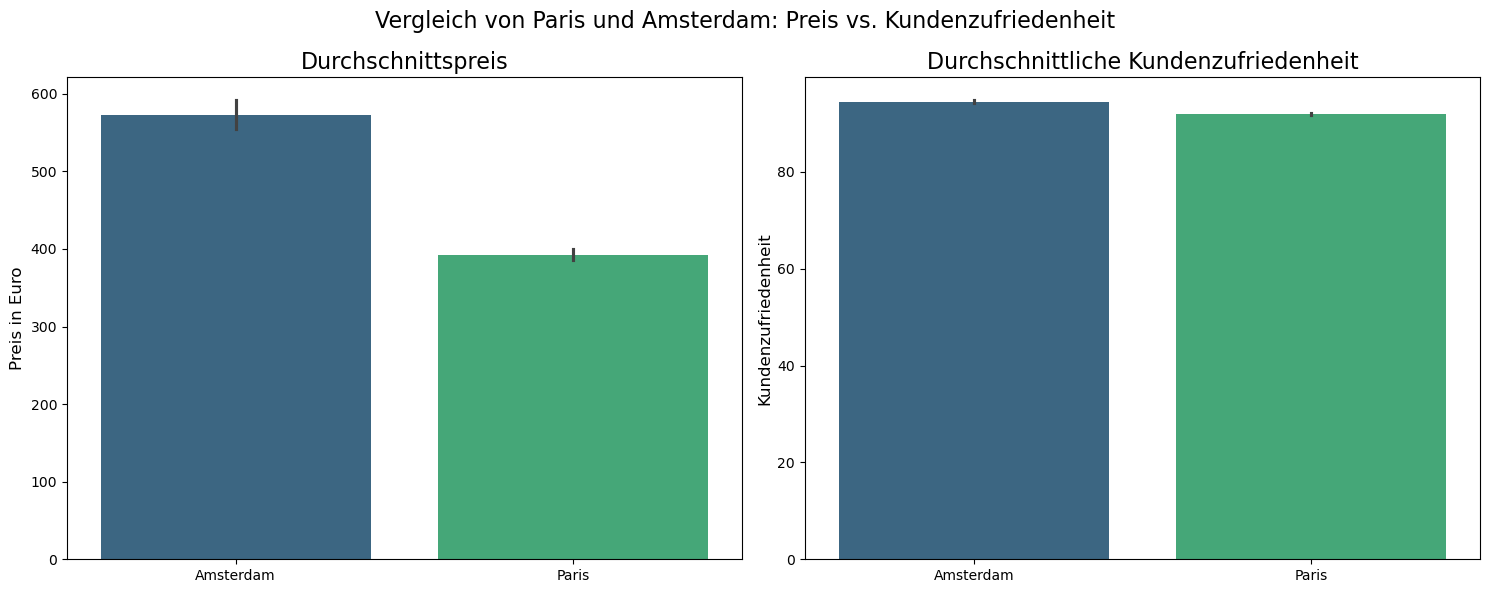

In [51]:
top_cities = ['Paris', 'Amsterdam']
filtered_data = airbnb[airbnb['City'].isin(top_cities)]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Preisvergleich
sns.barplot(data=filtered_data, x='City', y='Price', ax=ax1, palette='viridis')
ax1.set_title('Durchschnittspreis', fontsize=16)
ax1.set_ylabel('Preis in Euro', fontsize=12)
ax1.set_xlabel('')

sns.barplot(data=filtered_data, x='City', y='Guest Satisfaction', ax=ax2, palette='viridis')
ax2.set_title('Durchschnittliche Kundenzufriedenheit', fontsize=16)
ax2.set_ylabel('Kundenzufriedenheit', fontsize=12)
ax2.set_xlabel('')


plt.suptitle('Vergleich von Paris und Amsterdam: Preis vs. Kundenzufriedenheit', fontsize=16)


plt.tight_layout()
plt.savefig('sechste_grafik.png', dpi=300, bbox_inches='tight')

plt.show()